
**PySDS Week 02 Day 01 v.1 - Exercise - Manging DataFrames**

In [1]:
from IPython.display import display
%pylab inline
import os
import pandas as pd
from io import StringIO

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Recall the small table from week 1. Here it is again. 

muppet_input = '''
Name	Gender	Species	First Appearance
Fozzie	Male	Bear	1976
Kermit	Male	Frog	1955
Piggy	Female	Pig	1974
Gonzo	Male	Unknown	1970
Rowlf	Male	Dog	1962
Beaker	Male	Muppet	1977
Janice	Female	Muppet	1975
Hilda	Female	Muppet	1976
'''


# Step 1. 
# This time please convert it into a DataFrame 

muppet_string = StringIO(muppet_input)
# muppet_output = muppet_input.strip().split('')
muppet_df = pd.read_csv(muppet_string, sep = '\t', index_col='Name')

display(muppet_df)

# Step 2. Please answer the following questions using the DataFrame:

# A. What are the details for Fozzie Bear

print('\n')
display(muppet_df.loc['Fozzie'])

# - Return these printed in a sentence of the form
# - <Name> is a <gender> <species> who first appeared in <date>

print('\n')
print(muppet_df.index[0], 'is a', muppet_df.iloc[0, 0], 'who first appeared in', muppet_df.iloc[0, 2])

# B. Who appeared before 1976 (i.e. the year the Muppet Show started).
# Return this as a DataFrame. 

print('\n')
before_1976 = muppet_df['First Appearance']<1976

display(muppet_df[before_1976])

# Step 3 . Adding a row of data
# Please add a row for 
# "Rizzo"  a male rat who first appeared in 1980. 

# Appending a DataFrame with columns unspecified
rizzo = pd.DataFrame([['Male', 'Rat', 1980]], columns=['Gender', 'Species', 'First Appearance'], index=['Rizzo'])

display(muppet_df.append(rizzo))

# OR
# display(pd.concat([muppet_df, rizzo]))

# Answer 

# Concatenate the csv files into a single file


# Reviewer's comments


,Gender,Species,First Appearance
Name,,,
Fozzie,Male,Bear,1976
Kermit,Male,Frog,1955
Piggy,Female,Pig,1974
Gonzo,Male,Unknown,1970
Rowlf,Male,Dog,1962
Beaker,Male,Muppet,1977
Janice,Female,Muppet,1975
Hilda,Female,Muppet,1976


Gender              Male
Species             Bear
First Appearance    1976
Name: Fozzie, dtype: object



Fozzie is a Male who first appeared in 1976




,Gender,Species,First Appearance
Name,,,
Kermit,Male,Frog,1955
Piggy,Female,Pig,1974
Gonzo,Male,Unknown,1970
Rowlf,Male,Dog,1962
Janice,Female,Muppet,1975


,Gender,Species,First Appearance
Fozzie,Male,Bear,1976
Kermit,Male,Frog,1955
Piggy,Female,Pig,1974
Gonzo,Male,Unknown,1970
Rowlf,Male,Dog,1962
Beaker,Male,Muppet,1977
Janice,Female,Muppet,1975
Hilda,Female,Muppet,1976
Rizzo,Male,Rat,1980


In [3]:
# Creating a DataFrame of Muppet show episodes by season.
# * Note, there is a fifth season of the muppets which was not included.
#   This will be addressed next week.
#
# Step 1. 
#
# Using the text from the previous week contained within 
#  muppet_episodes_by_season.zip
# unzip the files (that can be done manually), read each one of them
# in as a DataFrame, then merge the dataframes to have a single 
# dataframe. 

df = pd.DataFrame()

subfolder = "muppet_episodes_by_season"
files_list = os.listdir("./"+subfolder)

for i,name in enumerate(files_list):
    df_temp = pd.read_csv("./"+subfolder+"/" + name, index_col = 0)
    df = df.append(df_temp)

display(df.head())

# Step 2. 
#
# Did any of the guest stars appear more than once? 
# Did every season have the same number of episodes? Maybe value count

# Answer 
display(df['episodeName'].value_counts())
print('\nNo guest star one appeared more than once\n')

display(df['airedSeason'].value_counts())
print('\nEvery season had the same number of episodes\n')

# Reviewer's comments



,episodeName,airedEpisodeNumber,airedSeason
72,John Denver,1,4
73,Linda Lavin,2,4
74,Shields & Yarnell,3,4
75,Crystal Gayle,4,4
76,Kenny Rogers,5,4


Avery Schreiber                       1
Cleo Laine                            1
Christopher Reeve                     1
Judy Collins                          1
Bernadette Peters                     1
Dizzy Gillespie                       1
Mark Hamill                           1
Phyllis Diller                        1
Gilda Radner                          1
Shields & Yarnell                     1
Don Knotts                            1
Rich Little                           1
Lola Falana                           1
Raquel Welch                          1
Mummenschanz                          1
Harvey Korman                         1
Beverly Sills                         1
Jaye P. Morgan                        1
Petula Clark                          1
Kenny Rogers                          1
Sandy Duncan                          1
Dudley Moore                          1
Steve Martin                          1
Lou Rawls                             1
Pearl Bailey                          1



No guest star one appeared more than once



4    24
3    24
2    24
1    24
Name: airedSeason, dtype: int64


Every season had the same number of episodes



In [4]:
# Working with a column of data 

# Using the table of data above split the guest stars name 
# so that the first name is in its own column. 
# Find and print the name of the guest star with the longest first name. 
# Print it in a sentence that also includes the guest star's episode number.

# Bonus! Now recall that we were looking for first name, not a group name
# So in your answer, split the text. 
# If the entry has more or less than two entries, discard it.
# Does this make a difference? 

# Answer

df["first_name"] = df["episodeName"].map(lambda name: name.split(" ")[0])
df["first_name_len"] = df["first_name"].map(lambda name: len(name))

df["individuals"] = df["episodeName"].map(lambda name: len(name.split()) == 2)

df_new = df[df["individuals"] == True]

display(df_new)

longest_name = list(df.loc[df_new['first_name_len'].idxmax()])
print ("The name of the guest star with the longest first name is {} in episode {} in season {}.".format(longest_name[0],longest_name[1], longest_name[2]))


,episodeName,airedEpisodeNumber,airedSeason,first_name,first_name_len,individuals
72,John Denver,1,4,John,4,True
73,Linda Lavin,2,4,Linda,5,True
75,Crystal Gayle,4,4,Crystal,7,True
76,Kenny Rogers,5,4,Kenny,5,True
77,Dudley Moore,6,4,Dudley,6,True
78,Victor Borge,7,4,Victor,6,True
79,Beverly Sills,8,4,Beverly,7,True
80,Liza Minnelli,9,4,Liza,4,True
81,Lola Falana,10,4,Lola,4,True
82,Phyllis George,11,4,Phyllis,7,True


The name of the guest star with the longest first name is Christopher Reeve in episode 14 in season 4.


Populating the interactive namespace from numpy and matplotlib


5.193181818181818

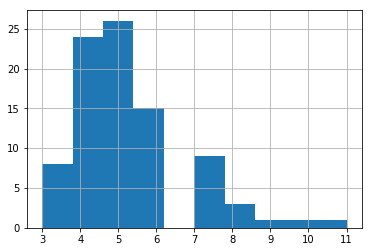

In [5]:
# Plotting the data. 
# Create a histogram of the distribution of first names 
# (from the previous question). 
# Hint: series.plot(kind="hist")
# What is the average name length? 
# Is it heavy tailed (answer this to the best of your knowledge)? 


# Answer 

%pylab inline

df_new["first_name_len"].hist()
df_new["first_name_len"].mean()

# Tail is skewed to the... 

# Reviewer's comments

